<font color='blue'>
    
# ECE449 Machine Learning - Assignment 2

## Task 2: Simple and Small DNN with PyTorch


[//]: # "Notebook Created by Jinghua Wang (jinghuawang@intl.zju.edu.cn), last modified on 2020-11-03"

</font>

Below is a simple Deep Neural Network(DNN) model with input dimension = 3 and output dimension = 1, this DNN has 1 hidden layer, and the activation function is ReLu:
<img src="img/simple_DNN.png" width="500" height="250">

Now, let's use PyTorch to build the simple DNN we have seen above, and we use gradient decent method to train this DNN to fit a randomly generated dataset for a binary classification problem.

<font color='blue'>
    
### We provide you this file so that you can test and debug your task 2 implementations in your .py file by yourself, you don't need to modify any code in this jupyter notebook, but you are welcome to change implementations in this notebook if you want to play with this example model training process.
    
### You don't need to submit this notebook.
    
</font>

In [1]:
# use automatic reloading for your code from task2-template.py
# remember to rename task2-template.py before you submit it.
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import time
from matplotlib import pyplot as plt
from task1_template import generate_random_dataset, normalize_dataset, visualize_dataset, plotDNNInferenceEpoch
from task2_template import *

## 1. Generate Random Dataset

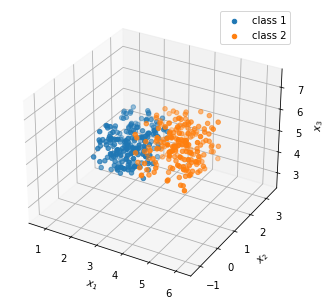

In [3]:
# Generate a random dataset and visualize it.
num_samples = 400
dataset = generate_random_dataset(num_samples)
visualize_dataset(dataset, window_title="Random Generated Dataset")

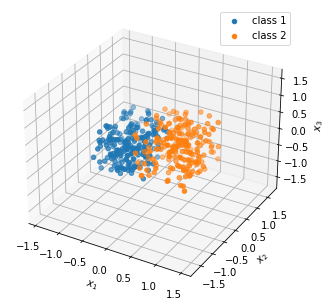

In [4]:
# Normalize the dataset and visualize the normalized dataset.
dataset = normalize_dataset(dataset)
visualize_dataset(dataset, window_title="Normalized Dataset")

## 2. Check your DNN implementation

In [5]:
net = get_DNN()

In [6]:
# check nn data output shapes
X = torch.randn(size=(10, 3), dtype=torch.float32)
print("The output data shapes of all layers in your DNN are:")
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

The output data shapes of all layers in your DNN are:
Linear output shape: 	 torch.Size([10, 2])
ReLU output shape: 	 torch.Size([10, 2])
Linear output shape: 	 torch.Size([10, 1])


In [7]:
print("The output data shapes of all layers in correct DNN are:")
print(get_correct_DNN_shape_str())

The output data shapes of all layers in correct DNN are:
Linear output shape: 	 torch.Size([10, 2])
ReLU output shape: 	 torch.Size([10, 2])
Linear output shape: 	 torch.Size([10, 1])


#### In the two cells above, all the layer names, and the output data shapes of all the layers should be the same. 
#### (Please do not modify the layer names)

Congratulations on getting DNN structure correct! Next let's train your DNN model and see if your train_torch function works correctly.

## 3. Train the DNN Model

In [8]:
W_list, K_list = train_torch(net, dataset[:,:3], dataset[:, 3], num_epochs=100, lr=0.005, batch_size=20)
print_net_params_and_acc(net, dataset[:,:3], dataset[:,3], False)

Before training: 
The initial W is:

[[ 0.19077838  0.12562325 -0.03901907]
 [-0.06086286  0.12760362 -0.02342936]]

The initial K is:

[ 0.05561975 -0.15734838]
The accuracy before training is: 0.5

After training: 
The trained W is:

[[-0.62818513  0.5152821  -0.5066068 ]
 [-0.60302468  0.49558117 -0.48691754]]

The trained K is:

[ 1.16449358 -1.2096346 ]
The accuracy after training is: 1.0



#### After training, your DNN train accuracy should be almost 100% after training using our default settings. If your train accuracy is below 95% we suggest you check your implementations again, particularly your implementations in the train function.

Congratulations on finishing task 2! Below is an optional task for visualizing the model inference boundary of your DNN during the training process.

## 4. Visualize the Training Process

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interactive(children=(IntSlider(value=99, description='epoch_idx', max=99), Output()), _dom_classes=('widget-i…

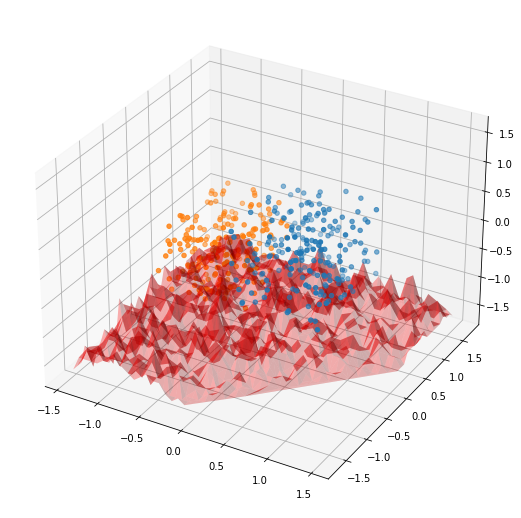

In [10]:
# this code block requires a correct DNNforward implementation in task 1 to work correctly
total_epochs = len(W_list)
if total_epochs > 1:
    interact(plotDNNInferenceEpoch, 
             epoch_idx = widgets.IntSlider(total_epochs-1, 0, total_epochs-1, 1),
             dataset = fixed(dataset),
             W_list = fixed(W_list),
             K_list = fixed(K_list),
    )